In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc

In [14]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [15]:
credit.shape

(662, 31)

In [16]:
colnames=['TIME', 'V1', 'V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','AMOUNT','CLASS'] 
credit = pd.read_csv('creditcard.csv', names=colnames, header=None)
credit

,TIME,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,AMOUNT,CLASS
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [17]:
credit.isnull().sum()

TIME      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
AMOUNT    0
CLASS     0
dtype: int64

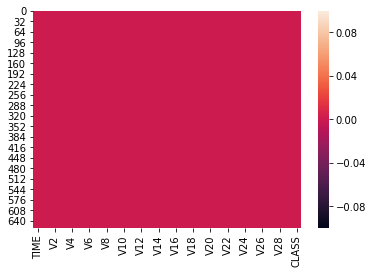

In [18]:
sns.heatmap(credit.isnull())

In [19]:
x=credit.iloc[:,0:-1]
x.head()

,TIME,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,AMOUNT
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [20]:
y=credit.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

In [21]:
count=credit.iloc[:,-1].value_counts()
count

0    637
1     26
Name: CLASS, dtype: int64

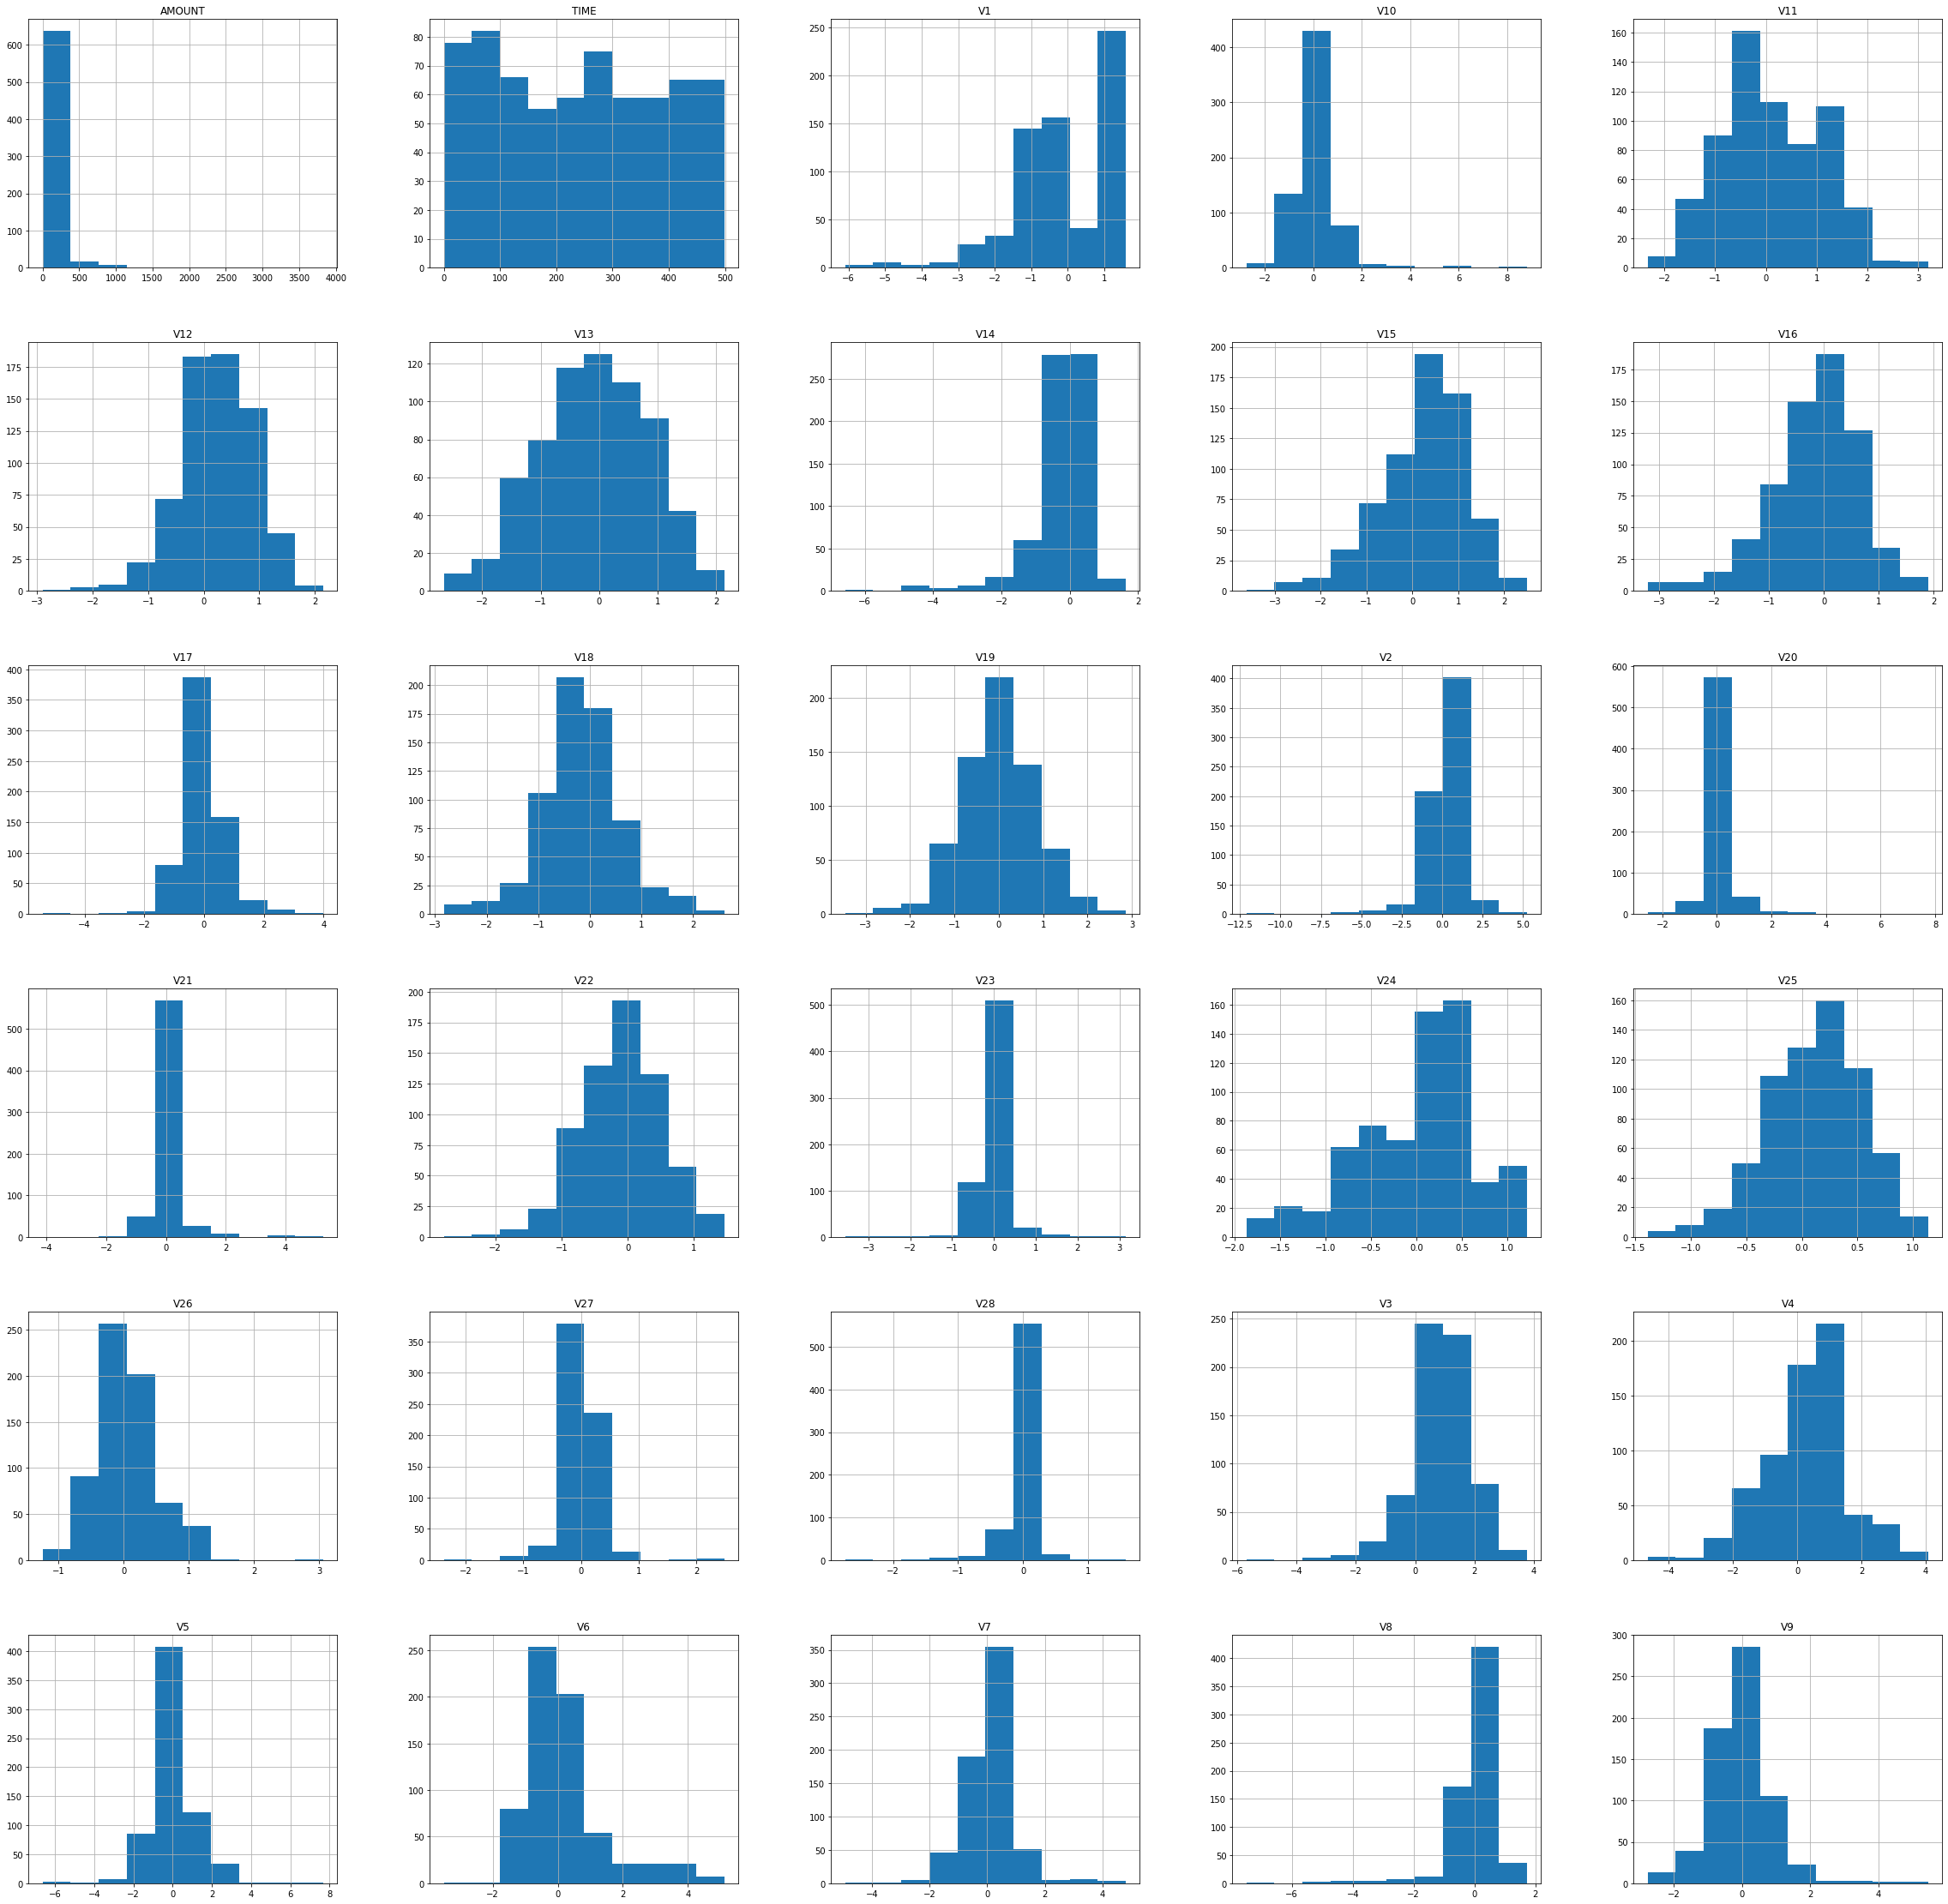

In [22]:
x.hist(figsize = (40,40))
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

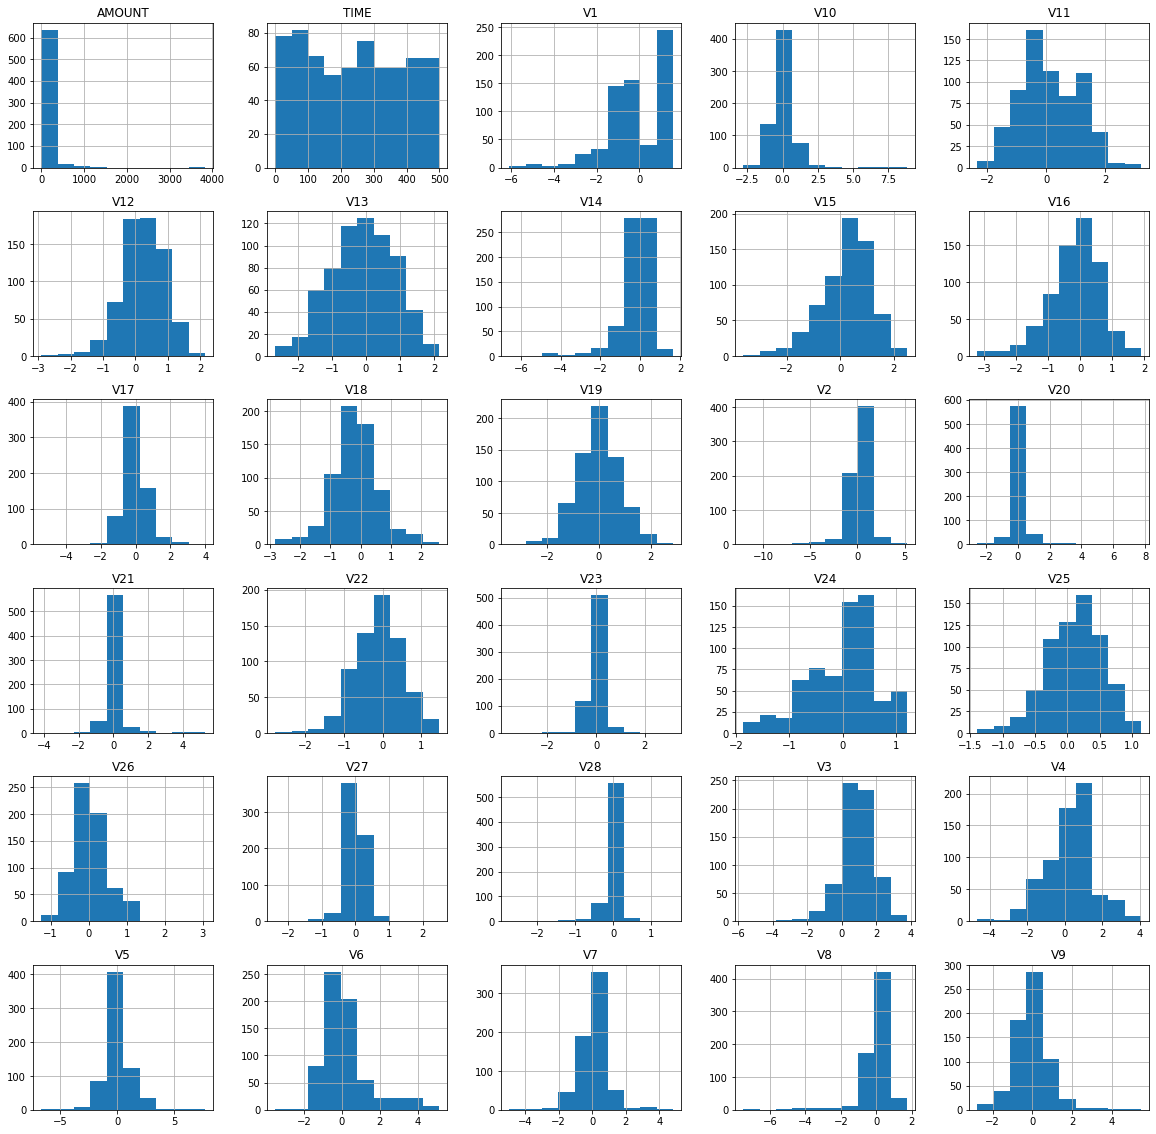

In [24]:
x.hist(figsize = (20, 20))
plt.show()

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=20)

In [105]:
x_test.shape

(299, 30)

In [106]:
y_test.shape

(299,)

In [107]:
x_train.shape

(364, 30)

In [108]:
y_train.shape

(364,)

In [109]:
logr=LogisticRegression()

In [110]:
logr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_pred = logr.predict(x_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       290
           1       0.00      0.00      0.00         9

    accuracy                           0.97       299
   macro avg       0.48      0.50      0.49       299
weighted avg       0.94      0.97      0.95       299



In [113]:
print(confusion_matrix(y_test,y_pred))

[[289   1]
 [  9   0]]


In [114]:
print(metrics.accuracy_score(y_test,y_pred))

0.9665551839464883


In [115]:
from sklearn.metrics import roc_curve
y_predict_prob = logr.predict_proba(x_test)[:, 1]

In [116]:
y_predict_prob.shape

(299,)

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)

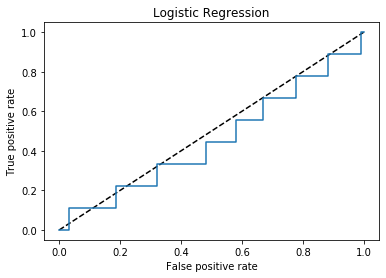

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.4982758620689655


In [120]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.45325670498084286


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(n_estimators=100)

In [123]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
y_pred = rf.predict(x_test)

In [125]:
cm = confusion_matrix(y_test, y_pred)

In [126]:
cm

array([[290,   0],
       [  9,   0]], dtype=int64)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       290
           1       0.00      0.00      0.00         9

    accuracy                           0.97       299
   macro avg       0.48      0.50      0.49       299
weighted avg       0.94      0.97      0.96       299



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
y_predict_prob = rf.predict_proba(x_test)[:, 1]

In [129]:
y_predict_prob.shape

(299,)

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)

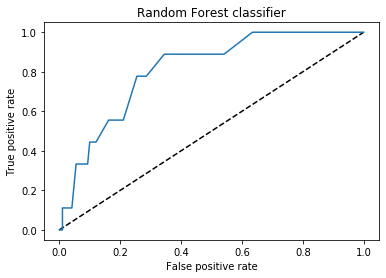

In [131]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest classifier')
plt.show()

In [132]:
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.5


In [133]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.8095785440613028


In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
gb=GradientBoostingClassifier()

In [136]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
y_pred = gb.predict(x_test)

In [138]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[290   0]
 [  9   0]]


In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       290
           1       0.00      0.00      0.00         9

    accuracy                           0.97       299
   macro avg       0.48      0.50      0.49       299
weighted avg       0.94      0.97      0.96       299



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
y_predict_prob = gb.predict_proba(x_test)[:, 1]

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)

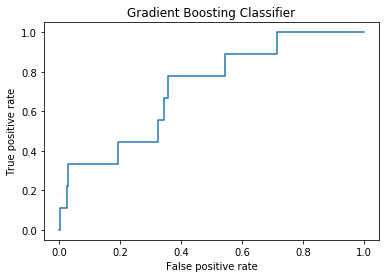

In [142]:
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()

In [143]:
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.5


In [144]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.7183908045977012


In [145]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [146]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [147]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [148]:
y_pred = xg.predict(x_test)

In [149]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[290   0]
 [  9   0]]


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       290
           1       0.00      0.00      0.00         9

    accuracy                           0.97       299
   macro avg       0.48      0.50      0.49       299
weighted avg       0.94      0.97      0.96       299



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [151]:
y_predict_prob = gb.predict_proba(x_test)[:, 1]

In [152]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)

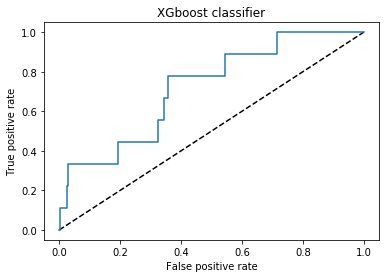

In [153]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGboost classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGboost classifier')
plt.show()

In [154]:
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.5


In [155]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.7183908045977012


In [156]:
#Randomforestclassifier is found to be the best model
#saving the model using pickle

In [157]:
import pickle
saved_model=pickle.dumps(rf)